In [ ]:
# 나눔고딕 설치 및 런타임>런타임 다시시작 실행 후 코드 실행.
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 9 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,596 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120880 files and direc

In [ ]:
# Pakage 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.rc('font', family='NanumBarunGothic')

# 데이텉 불러오기
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/시간별 육지 제주 태양광 및 풍력발전량(2209_2302).csv', encoding = 'CP949')
df = df.iloc[:, :6]

# 개괄적인 정보 확인하기
display(df.head(2))
display(df.info())
display(df.describe())

,거래일,거래시간,육지태양광 총발전량(MWh),육지풍력 총발전량(MWh),제주태양광 총발전량(MWh),제주풍력 총발전량(MWh)
0,2022-09-01,0,2.003707,135.066438,0.000280,90.820607
1,2022-09-01,1,0.463112,110.416795,0.066412,70.912486


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4344 entries, 0 to 4343
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   거래일                4344 non-null   object 
 1   거래시간               4344 non-null   int64  
 2    육지태양광 총발전량(MWh)   4344 non-null   float64
 3    육지풍력 총발전량(MWh)    4344 non-null   float64
 4    제주태양광 총발전량(MWh)   4344 non-null   float64
 5    제주풍력 총발전량(MWh)    4344 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 203.8+ KB


None

,거래시간,육지태양광 총발전량(MWh),육지풍력 총발전량(MWh),제주태양광 총발전량(MWh),제주풍력 총발전량(MWh)
count,4344.000000,4344.000000,4344.000000,4344.000000,4344.000000
mean,11.500000,837.405463,351.781186,42.241925,76.447246
std,6.922983,1021.059705,257.441094,69.161394,65.297775
min,0.000000,0.000000,0.552292,0.000000,0.000000
25%,5.750000,4.689188,123.331300,0.100318,18.071317
50%,11.500000,459.182243,315.512461,4.292111,58.760421
75%,17.250000,1298.717493,526.344364,57.515085,127.292773
max,23.000000,4725.450583,1088.191893,313.074643,254.727508


# EDA(Explain Data Analysis)
1. 거래일별 평균 발전량은 육지_태양광, 육지_풍력 발전량이 각각 차이가 존재.
2. 반면 제주_태양광, 제주_풍력은 발전량이 전반적으로 비슷한 값을 가짐.
3. 더 단순화 해서 거래월별 평균 발전량을 살펴보면 육지 태양광, 풍력 발전의 경우, 2022년 12월에 값이 비슷해지고 나머지는 태양광 발전량이 훨씬 우세한 것으로 추정. 아마도 지역별 발전소의 수의 차이, 지역별 햇빛 및 풍량의 차이 + 제주도보다 전체적인 지역 모수가 높아서 발전량에서도 큰 차이가 나타나는 것으로 생각 됨. 더 다른 데이터도 봐야 좋을 듯.
4. 육지 vs 제주가 아닌 태양광 vs 풍력으로 비교를 해봐도 발전량에는 큰 차이를 보임.
5. 시간대별 발전량을 확인했을 때는 7시부터 16시까지가 가장 태양광 발전의 발전량이 높고 풍력발전은 시간대별로 골고루 발전됨.

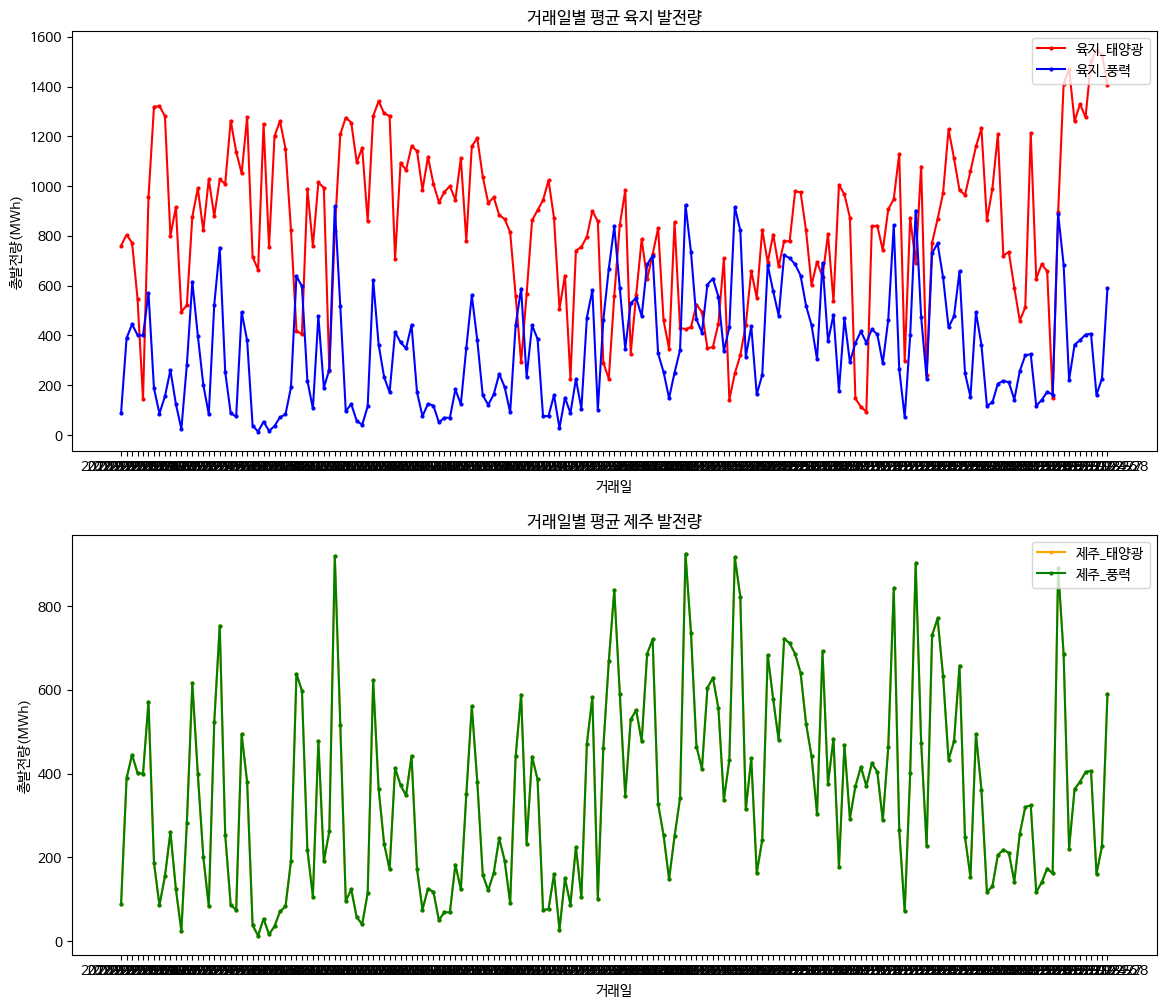

In [ ]:
# ExplainDataAnalysis

# 거래일별 평균 발전량
# https://www.aitimes.kr/news/articleView.html?idxno=29025
df_1 = df.groupby('거래일').mean()

land_sun = df_1.iloc[:,1]
land_wind = df_1.iloc[:,2]
jeju_sun = df_1.iloc[:,3]
jeju_wind = df_1.iloc[:,4]

# 그래프 그리기
fig = plt.figure(figsize = (14, 12))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df_1.index, land_sun, 'o-', c = 'red', markersize = 2, label = '육지_태양광')
ax1.plot(df_1.index, land_wind, 'o-', c = 'blue', markersize = 2, label = '육지_풍력')
ax1.legend(loc = 'upper right')
ax1.set_title('거래일별 평균 육지 발전량')
ax1.set_xlabel('거래일')
ax1.set_ylabel('총발전량(MWh)')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df_1.index, land_wind, 'o-', c = 'orange', markersize = 2, label = '제주_태양광')
ax2.plot(df_1.index, land_wind, 'o-', c = 'green', markersize = 2, label = '제주_풍력')
ax2.set_title('거래일별 평균 제주 발전량')
ax2.legend(loc = 'upper right')
ax2.set_xlabel('거래일')
ax2.set_ylabel('총발전량(MWh)')
plt.show()

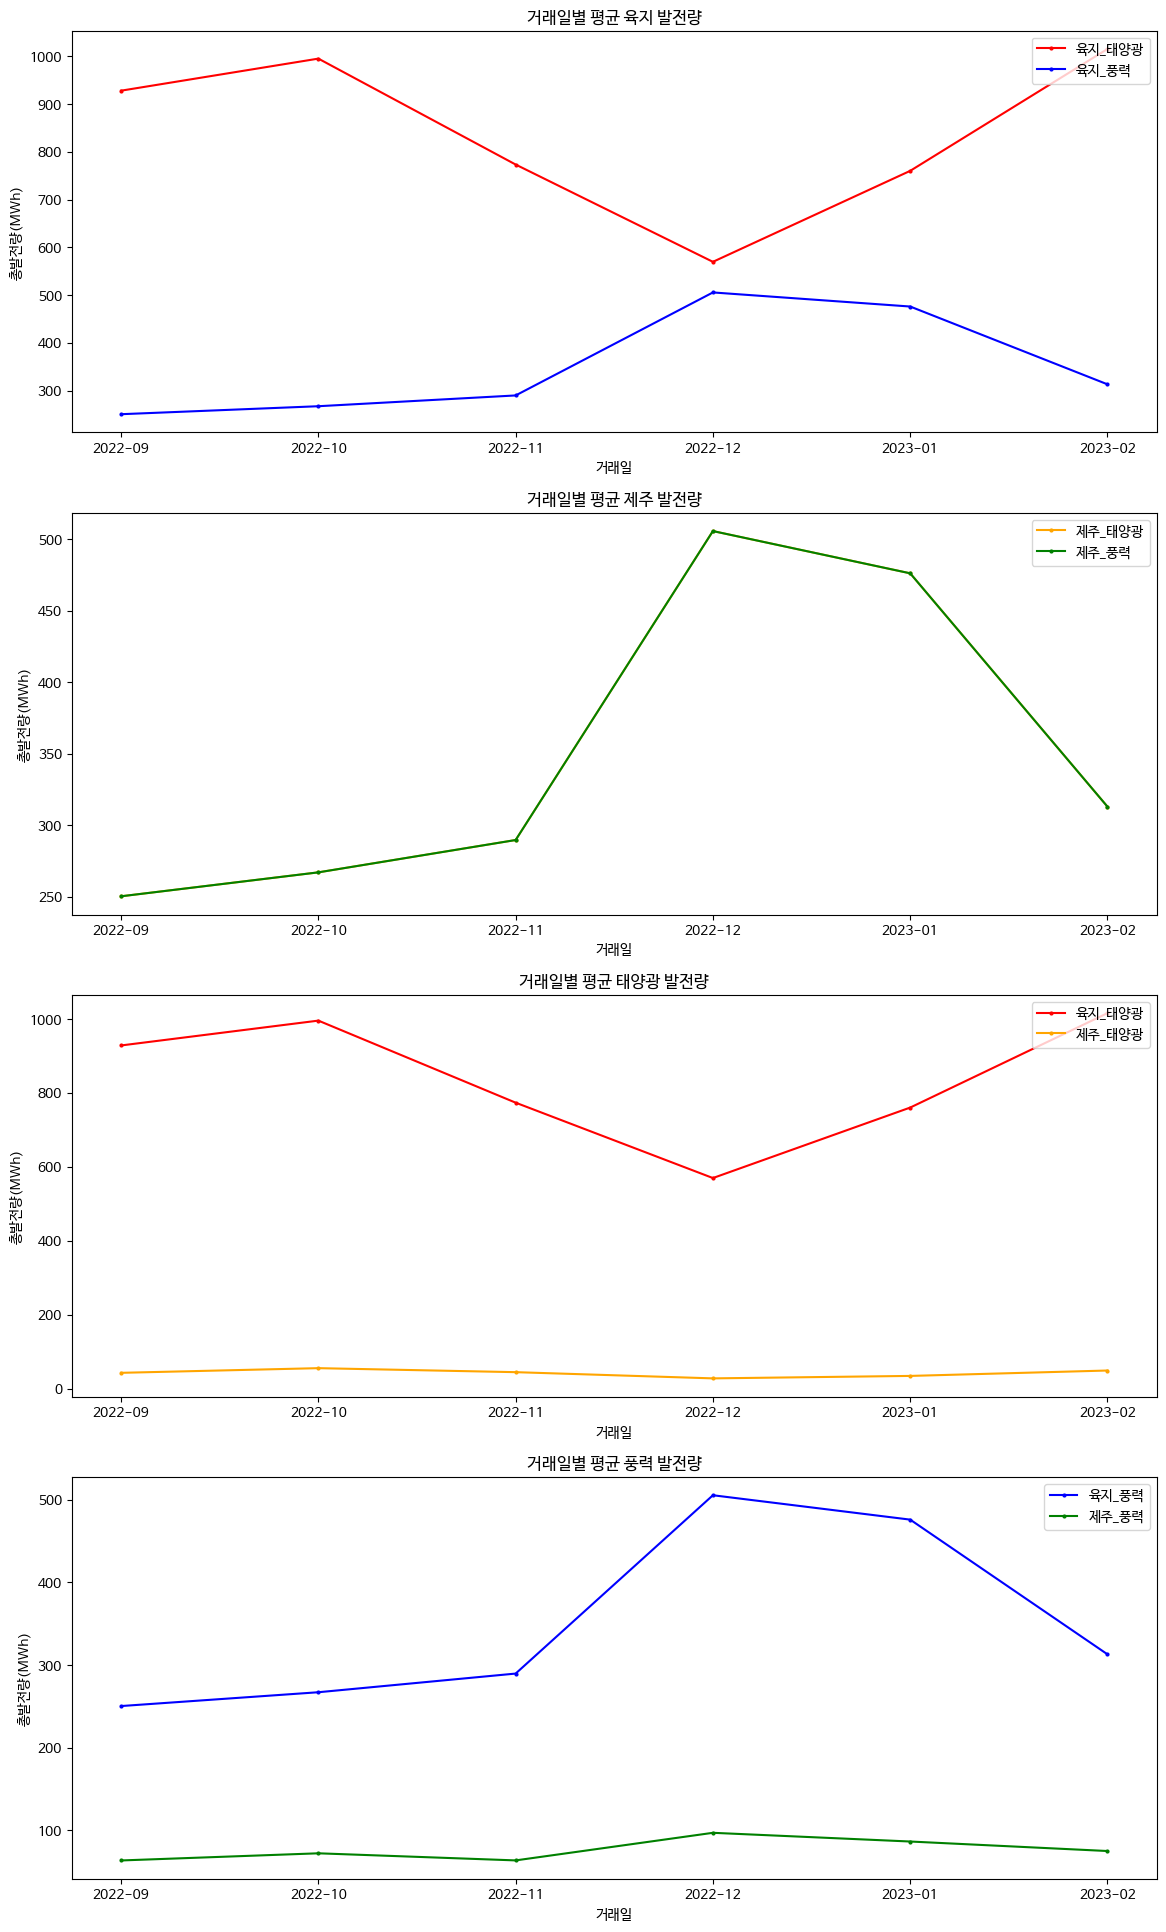

In [ ]:
# 거래일별 평균 발전량
# df['거래일'] = pd.to_datetime(df['거래일'])
df['거래년도 및 월'] = df['거래일'].str[:7]
df_2 = df.groupby('거래년도 및 월').mean()

land_sun = df_2.iloc[:,1]
land_wind = df_2.iloc[:,2]
jeju_sun = df_2.iloc[:,3]
jeju_wind = df_2.iloc[:,4]

# 그래프 그리기
fig = plt.figure(figsize = (14, 24))
ax1 = plt.subplot(4, 1, 1)
ax1.plot(df_2.index, land_sun, 'o-', c = 'red', markersize = 2, label = '육지_태양광')
ax1.plot(df_2.index, land_wind, 'o-', c = 'blue', markersize = 2, label = '육지_풍력')
ax1.legend(loc = 'upper right')
ax1.set_title('거래일별 평균 육지 발전량')
ax1.set_xlabel('거래일')
ax1.set_ylabel('총발전량(MWh)')

ax2 = plt.subplot(4, 1, 2)
ax2.plot(df_2.index, land_wind, 'o-', c = 'orange', markersize = 2, label = '제주_태양광')
ax2.plot(df_2.index, land_wind, 'o-', c = 'green', markersize = 2, label = '제주_풍력')
ax2.set_title('거래일별 평균 제주 발전량')
ax2.legend(loc = 'upper right')
ax2.set_xlabel('거래일')
ax2.set_ylabel('총발전량(MWh)')

ax3 = plt.subplot(4, 1, 3)
ax3.plot(df_2.index, land_sun, 'o-', c = 'red', markersize = 2, label = '육지_태양광')
ax3.plot(df_2.index, jeju_sun, 'o-', c = 'orange', markersize = 2, label = '제주_태양광')
ax3.set_title('거래일별 평균 태양광 발전량')
ax3.legend(loc = 'upper right')
ax3.set_xlabel('거래일')
ax3.set_ylabel('총발전량(MWh)')

ax4 = plt.subplot(4, 1, 4)
ax4.plot(df_2.index, land_wind, 'o-', c = 'blue', markersize = 2, label = '육지_풍력')
ax4.plot(df_2.index, jeju_wind, 'o-', c = 'green', markersize = 2, label = '제주_풍력')
ax4.set_title('거래일별 평균 풍력 발전량')
ax4.legend(loc = 'upper right')
ax4.set_xlabel('거래일')
ax4.set_ylabel('총발전량(MWh)')

plt.show()

Text(0, 0.5, '총발전량(MWh)')

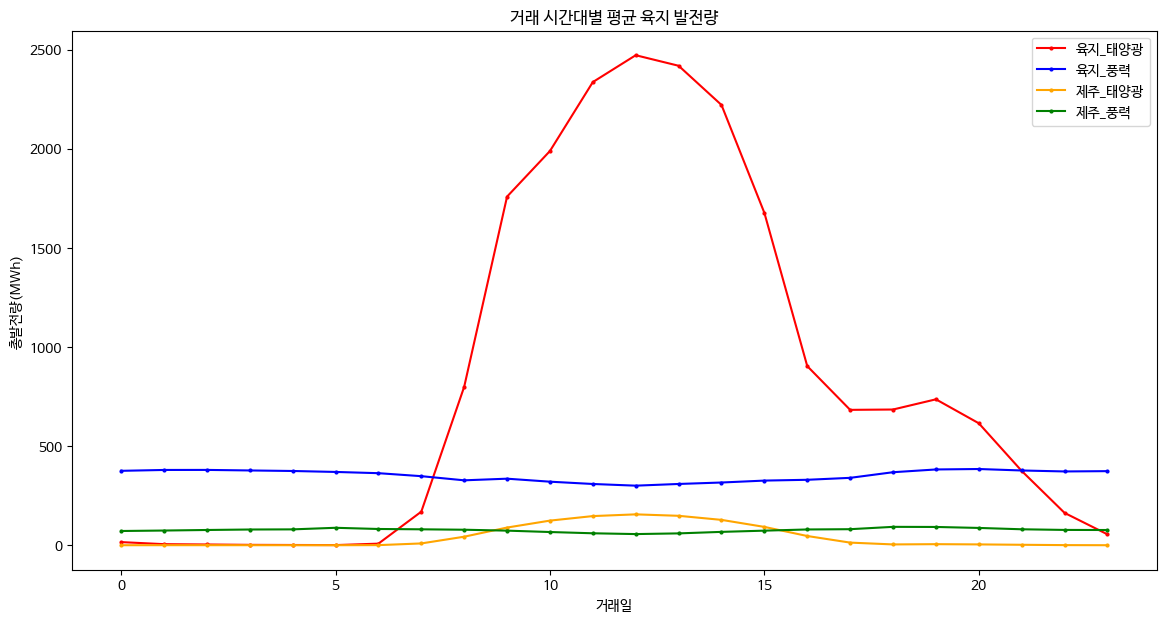

In [ ]:
# 시간대별 평균 발전량
df_3 = df.groupby(['거래시간']).mean()
land_sun = df_3.iloc[:,0]
land_wind = df_3.iloc[:,1]
jeju_sun = df_3.iloc[:,2]
jeju_wind = df_3.iloc[:,3]

fig = plt.figure(figsize = (14, 7))
ax1 = plt.subplot(1, 1, 1)
ax1.plot(df_3.index, land_sun, 'o-', c = 'red', markersize = 2, label = '육지_태양광')
ax1.plot(df_3.index, land_wind, 'o-', c = 'blue', markersize = 2, label = '육지_풍력')
ax1.plot(df_3.index, jeju_sun, 'o-', c = 'orange', markersize = 2, label = '제주_태양광')
ax1.plot(df_3.index, jeju_wind, 'o-', c = 'green', markersize = 2, label = '제주_풍력')
ax1.legend(loc = 'upper right')
ax1.set_title('거래 시간대별 평균 육지 발전량')
ax1.set_xlabel('거래일')
ax1.set_ylabel('총발전량(MWh)')
# df.columns

# EDA(2) - 결측값, 이상값, 상관성 확인
1. 결측값 : 이미 정제된 데이터셋이기에 결측값은 따로 보이지 않았음.
2. 이상값 : 육지 태양광 발전량이 발전량의 편차가 매우 컸으며, IQR4를 넘어가는 요인들로는 육지 태양광 발전, 제주 태양광 발전이 높았음
3. 풍력 발전은 데이터가 전반적으로 고르게 나타남.
4. 상관성 분석 결과 육지_태양광&제주_태양광, 육지_풍력&제주_풍력 사이에는 상관성이 존재, 특히, 육지_태양광&제주_태양광에는 0.89의 높은 상관성.
https://blog.naver.com/tms-energy/221633289094

결측값 확인


,거래일,거래시간,육지태양광 총발전량(MWh),육지풍력 총발전량(MWh),제주태양광 총발전량(MWh),제주풍력 총발전량(MWh),거래년도 및 월
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


이상값 확인


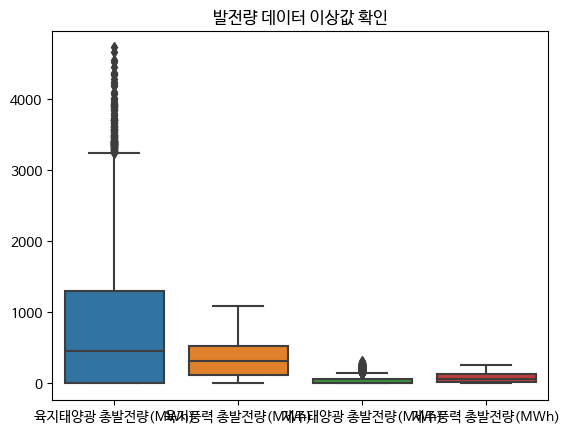

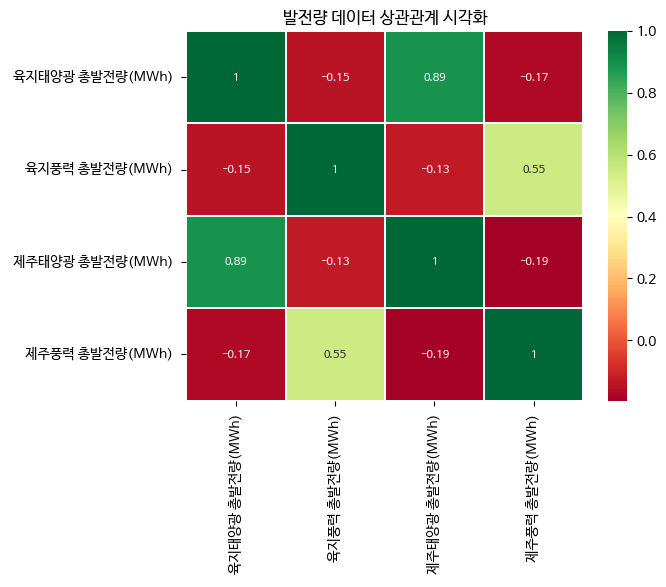

In [ ]:
print('결측값 확인')
display(pd.DataFrame((df.isnull().sum()/len(df))*100).round(3).T)

print('이상값 확인')
plt.title('발전량 데이터 이상값 확인')
sns.boxplot(data = df.iloc[:,2:6])
plt.show()

# 상관성 확인
corr = df.iloc[:, 2:6].corr()
corr_heatmap = sns.heatmap(corr,
cmap = 'RdYlGn',
linewidths = 0.1,
linecolor = 'white',
annot = True,
annot_kws = {'size':8})
plt.title('발전량 데이터 상관관계 시각화')
plt.show()

### TimeSeiresTransFormer
RNN(1986) -> LSTM(1997) -> Seq2Seq(2014)
Attention('15) -> Transformer('17) ~
- 추후 나온 GPT-1, GPT3 & BERT 또한 Transformer의 Decoder, Encoder 아키텍처 사용
* 기존 Seq2Seq 모델들의 한계
> 매번 단어가 입력될 때마다 이전 단어 값이 들어있는 은닉층 값은 갱신, 마지막 단어가 들어왔을 때 Context vector들어가기 전 은닉층은 모든 은닉층을 대표하는 은닉층이 된다.
> 고정된 크기의 Context Vector로 갖고 있는 것은 전체 성능을 저하시킬 수 있음.

* Attention 기법  
> 하나의 고정된 크기에 받는게 아니라 어차피 출력될거 전부를 입력으로 받으면 어떨까?
(GPU는 많은 메모리 및 병렬 처리를 지원)

* SeqtoSeq with Attention :
> Context Vector + 모든 은닉층 값 반영, 디코더는 매번 인코더의 모든 출력 중에서 어떤 정보가 중요한지 계산, 디코더에서 출력 단어를 만들떄마다!!

* Transformer :
> 1. Attention 기법만 사용해서 여러 Task를 수행. Rnn & CNN을 사용하지 않아 문장안에 포함된 데이터에 숫자 정보를 주기 어렵다. 순서정보를 주기 위해 Positional Encoding을 사용.  
> 2. Encoder & Decoder로 구성  
> 3. Attention 과정을 여러 레이어에서 진행. (16:00)

* Encoder  
> 입력값 임베딩(입력 위치 값포함) -> 어텐션을 수행(문장에 대한 학습을 잘 할 수 있도록) -> 성능 향상을 위해 잔여학습 진행 Attention -> 잔여학습 + Normalization  -> Feedforward Layer -> 잔여학습 + Normalization ... 가장 마지막 Layer에서 나온 값이 Decoder에 들어감

* Decoder  
> 1개의 DecoderLayer에서 2개의 Attention 사용  
> 트랜스포머에서는 마지막 인코더 레이어의 출력이 모든 디코더 레이어의 입력이 된다.  
> 특징은 RNN을 사용하지 않으며, 인코더와 디코더를 다수 사용, <EOS>가 나올 때 까지 사용.

* Attention
> 인코더와 디코더는 Multi-Head-Attention 레이어 사용.  
> 어텐션을 위한 3가지 입력 요소 : 쿼리(질의), 키(모든 단어), value(accention_score)  
> 어떤 값과 가장 연관성을 갖는지 구함. 확률 값과 value 값을 곱해서 가중치가 적용된 Attention Value를 구함. 쿼리, 키, 밸류  
> Encoder Self-Attention : 각각 값이 개별 값과 어떤 연관성을 갖는지 Learning  
> Masked Decoder Self-Attention : 모두 참고x, 앞의 단어만 각각 참고하도록  
> Encoder-Decoder Attention : 출력 쿼리 값이 입력값의 Key와 Value값을 참조  

디코더를 거친 후 나온 값에 Linear Layer와 SoftMax를 취해서 결과 확률값을 계산함.

In [ ]:
# train_test_split
# 7:3의 비율로 나눔. 7을 학습, 3을 실제 값과 딥러닝 결과 값으로 비교 예정.
df_train = df.iloc[:3041, :-1]
df_test = df.iloc[3041:, :-1]

# "제주 태양광 촐 발전량" 값만 train_test로 구분.
sun_test = df_test[' 제주태양광 총발전량(MWh) '].tolist()
sun_train = df_train[' 제주태양광 총발전량(MWh) '].tolist()

print("Training set has {} observations.".format(len(sun_train)))
print("Test set has {} observations.".format(len(sun_test)))

Training set has 3041 observations.
Test set has 1303 observations.


In [ ]:
import numpy as np

# 시계열 데이터를 Sequences로 변환
# 모델에 학습 가능한 형태로 만들기 위함.
# 패턴인식, 시간적 의존성을 이해시키기 위해,
# 데이터가 시간별로 구분되어 있기에 24개의 시퀀스로 구분.

def to_sequences(seq_size, obs):
    x = []
    y = []

    for i in range(len(obs)-SEQUENCE_SIZE):
        #print(i)
        window = obs[i:(i+SEQUENCE_SIZE)]
        after_window = obs[i+SEQUENCE_SIZE]
        window = [[x] for x in window]
        #print("{} - {}".format(window,after_window))
        x.append(window)
        y.append(after_window)

    return np.array(x),np.array(y)


SEQUENCE_SIZE = 24 # 24개의 시퀀스로 구분
# train_data와 test_data로 시퀀스에 맞게 재생성,
x_train, y_train = to_sequences(SEQUENCE_SIZE,sun_train)
x_test, y_test = to_sequences(SEQUENCE_SIZE,sun_test)

print("Shape of training set: {}".format(x_train.shape))
print("Shape of test set: {}".format(x_test.shape))

Shape of training set: (3017, 24, 1)
Shape of test set: (1279, 24, 1)


Q. 왜 Decoder를 정의 안했는가?
- Transformer 모델은 일반적으로 Incoder와 Decoder로 정의.
- 그러나 몇몇 시계열 예측 작업에서는 Encoder 단일 모듈만 사용해도 충분한 결과 값 얻을 수 있음.
- 특히, 본 문제에서는 단일 시퀀스인 다음 값을 예측 하는 작업이기에 디코더를 정의 x,
- 추후 더 많은 데이터가 쌓이고, 시간적 의존성이 더 높아질 경우 Decoder를 확장/추가하는 것도 하나의 방법.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import Callback

class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.val_losses = []

    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))

# Transforemer를 정의
# Multihead Self Attention와 FeedForwardNewtork를 포함.
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

# 실제 모델 Building
# Transformer 블록이 쌓인 후 Gloval Average Pooling이 적용.
# 풀링 이후 MLP 적용
def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(1)(x)
    return keras.Model(inputs, outputs)

In [ ]:
input_shape = x_train.shape[1:]

# HyperParameter 정의
# 추후 GridSearch, RandomizedSearch를 통해 성능 개선이 필요.

model = build_model(
    input_shape,
    head_size=256, # Attention의 차원 크기 결정(모델 복잡성&성능)
    num_heads=4, # Head의 차원의 수
    ff_dim=4, #  FFN의 차원의 크기(모델 복잡성)
    num_transformer_blocks=4, # Transformer Block을 몇개?( 너무 많아도 과적합, 교차검증 진행)
    mlp_units=[128], # MLP 은닉층 갯수(표현능력 향상)
    mlp_dropout=0.4, # mlp_Drop_Out 비율
    dropout=0.25, # Drop_Out 비율
)

# 손실함수는 MSE, Optimizer는 Adam
# Model Compileing
model.compile(
    loss="mean_squared_error",
    optimizer=keras.optimizers.Adam(learning_rate=1e-4)
)
#model.summary()
# 모델 컴파일 이후에 LossHistory 콜백을 초기화.
loss_history = LossHistory()

# Earlystopping Callback을 활용해 손실 값이 개선 안될 경우, 조기종료.
callbacks = [keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True), loss_history]

# 모델 학습
model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    epochs=150,
    batch_size=64,
    callbacks=callbacks,
)

model.evaluate(x_test, y_test, verbose=1)

38/38 [==============================] - 16s 427ms/step - loss: 1503.0072 - val_loss: 382.0660
Epoch 11/150
38/38 [==============================] - 16s 426ms/step - loss: 1500.6993 - val_loss: 374.6277
Epoch 12/150
38/38 [==============================] - 16s 426ms/step - loss: 1421.3517 - val_loss: 370.1759
Epoch 13/150
38/38 [==============================] - 16s 420ms/step - loss: 1425.2627 - val_loss: 364.5048
Epoch 14/150
38/38 [==============================] - 16s 416ms/step - loss: 1262.5526 - val_loss: 355.1870
Epoch 15/150
38/38 [==============================] - 16s 415ms/step - loss: 1287.8024 - val_loss: 349.4036
Epoch 16/150
38/38 [==============================] - 15s 391ms/step - loss: 1187.0153 - val_loss: 344.5962
Epoch 17/150
38/38 [==============================] - 15s 397ms/step - loss: 1173.8784 - val_loss: 340.5555
Epoch 18/150
38/38 [==============================] - 16s 412ms/step - loss: 1145.8259 - val_loss: 335.0252
Epoch 19/150
38/38 [=====================

215.22439575195312

In [ ]:
from sklearn import metrics

# 예측 및 평가
pred = model.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Score (RMSE): {}".format(score))

40/40 [==============================] - 4s 72ms/step
Score (RMSE): 14.670527979540497


In [ ]:
x_test.shape

(1279, 24, 1)

In [ ]:
# 실제 값 및 예측값 비교
df_results = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': pred.flatten()})
print(df_results)

        Actual  Predicted
0     4.242354   8.954116
1     1.335166  -0.548225
2     2.791885   3.367845
3     1.356188   4.693937
4     0.071166   2.451904
...        ...        ...
1274  8.290734   6.759487
1275  8.388349   8.526699
1276  5.545484   6.672581
1277  1.949271   2.852786
1278  0.018568   1.360846

[1279 rows x 2 columns]


In [ ]:
# time에 따른 loss 시각화
plt.plot(loss_history.losses, label='Training Loss')
plt.plot(loss_history.val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

AttributeError: ignored

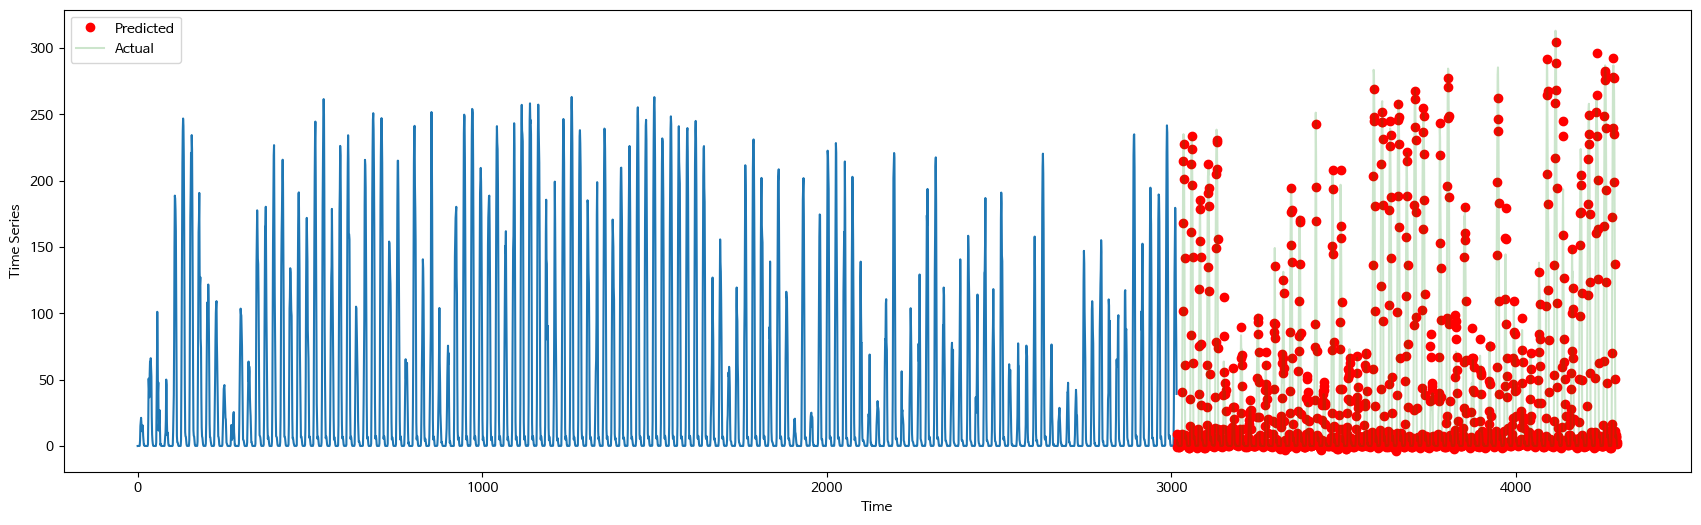

X축은 시간 y축은 시계열 데이터 plot
몇개 튀는 값들은 존재하나 대체적으로 잘 학습 됨.


In [ ]:
 # 예측 결과 시각화
 a_axis = np.arange(0, len(y_train))
 b_axis = np.arange(len(y_train), len(y_train) + len(pred))

 plt.figure(figsize=(21,6))
 plt.plot(a_axis, y_train.reshape(-1,), '-')
 plt.plot(b_axis, pred.reshape(-1,), 'o', color='red', label='Predicted')
 plt.plot(b_axis, y_test.reshape(-1,), '-', color='green', alpha=0.2, label='Actual')
 plt.xlabel("Time")

 plt.ylabel("Time Series")
 plt.legend()
 plt.show()
 print('X축은 시간 y축은 시계열 데이터 plot')
 print('몇개 튀는 값들은 존재하나 대체적으로 잘 학습 됨.')

In [ ]:
# Transformer 기반 Forcasting 을 발전시켜 나가면 좋을 듯.
# 1. Informer (AAAI 2021)
# 2. Autoformer (Neurips 2021)
# 3. Pyraformer (ICLR 2022)
# 4. Fedformer (ICML 2022)
# 5. EarthFormer (Neurips 2022)
# 6. Non-Stationary Transformer (Neurips 2022).

# 태양광 발전량 값을 예측하는 통합 모니터링 시스템에 딥러닝 모델을 추가한다면
# 사용자의 만족도를 더 높일 수 있는 결과 값을 제공할 수 있다.